In [ ]:
import os.path
import time

import torch
torch.cuda.empty_cache()

In [1]:
from src.efficentnet_train import data_load,model_train,visualization,utils,generate_dataset,evaluation
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from src.efficentfacenet import face_descriptor
from torchvision import transforms
import pandas as pd



In [2]:
dataset_path = "../dataset/preprocessed"
model_weights_path="../model_weights/training"
batch_size=4
stop_n_layers=5

In [3]:
model = face_descriptor.FaceDescriptorModel(download_weights=True, version="efficientnet_b1")
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((240, 240)), data_load.Normalize()])

In [4]:
train_dataset = data_load.FacesDataset(f"{dataset_path}/train", 50000, transform,True)
test_dataset=data_load.FacesDataset(f"{dataset_path}/test", 10000, transform,True)


 16.16279 % of the folders processederror loading --> ../dataset/preprocessed/train\1423\128964.jpg
 100.0 % of the folders processed img dict loaded in 0.29 m
 100.0 % of the folders processed img dict loaded in 0.08 m


In [4]:
train_dataset = data_load.FacesDataset(f"{dataset_path}/train", 10, transform,False)
test_dataset=data_load.FacesDataset(f"{dataset_path}/test", 5, transform,False)

In [5]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [6]:
#load model weights
model.load_local_weights("weights.pt",cuda_weights=True)

FileNotFoundError: [Errno 2] No such file or directory: 'weights.pt'

In [5]:
a_batch, p_batch, n_batch = next(iter(train_dataset))

In [6]:
a_batch.shape

torch.Size([3, 240, 240])

In [44]:
# for i in range(30):
#     _,ax=plt.subplots(1,3)
#     ax[0].set_title("Anchor")
#     ax[0].imshow(a[i])
#
#     ax[1].set_title("Positive")
#     ax[1].imshow(p[i])
#
#     ax[2].set_title("Negative")
#     ax[2].imshow(n[i])

In [12]:
import torch
import time
x=torch.tensor([1,2])
x.unsqueeze(1)


tensor([[1],
        [2]])

0.1745314598083496


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

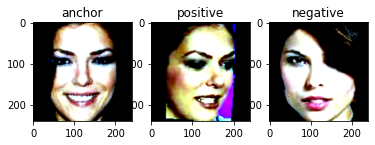

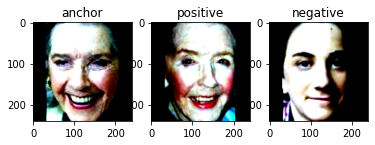

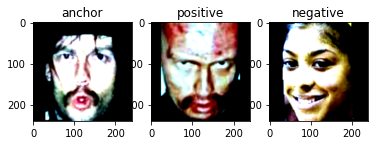

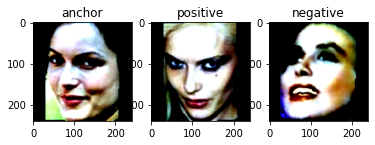

In [17]:
ts=time.time()
a_batch, p_batch, n_batch = next(iter(train_loader))
print(time.time()-ts)
model.eval()
with torch.no_grad():
    for i in range(batch_size):

        fig, ax = plt.subplots(1, 3)

        # anchor_vector=model(a_batch[i].unsqueeze(0)).detach()[0]
        # positive_vector=model(p_batch[i].unsqueeze(0)).detach()[0]
        # negative_vector=model(n_batch[i].unsqueeze(0)).detach()[0]

        ax[0].set_title("anchor")
        ax[0].imshow(a_batch[i].numpy().transpose([1,2,0]))


        ax[1].set_title("positive")
        ax[1].imshow(p_batch[i].numpy().transpose([1,2,0]))



        ax[2].set_title("negative")
        ax[2].imshow(n_batch[i].numpy().transpose([1,2,0]))




        # print(f"anchor vs Positive = {utils.euclidean_distance(anchor_vector.numpy(),positive_vector.numpy())}")
        # print(f"anchor vs negative = {utils.euclidean_distance(anchor_vector.numpy(),negative_vector.numpy())}")

TypeError: Invalid shape (3, 240, 240) for image data

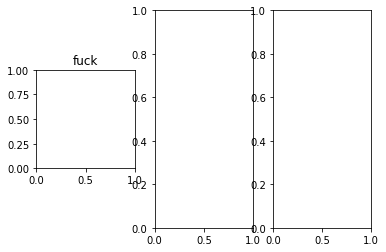

In [19]:
_, ax = plt.subplots(1, 3)
ax[0].set_title("fuck")
ax[0].imshow(a_batch[0])
_.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


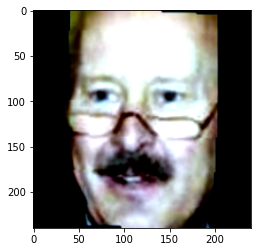

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


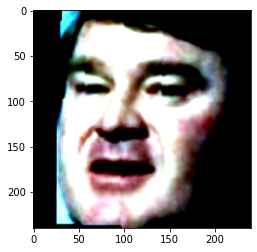

In [5]:
for i in range(batch_size):
  ax,_=plt.subplots(1,3)
  ax[0].imshow(a_batch[i].numpy().transpose([1,2,0]))
a = a[0].numpy().transpose([1,2,0])
plt.imshow(a)

In [20]:
for i in range(stop_n_layers):
  for parm in model.features[i].parameters():
    parm.requires_grad=False


In [7]:
train_losses=model_train.triplet_loss_train(model,epochs=10,learn_rate=0.001,train_loader=train_loader,test_loader=test_loader,cuda=False,weight_saving_path=model_weights_path,epoch_data_saving_path="",notes="new start")

 epoch 1 [==========] time remaining = 0.024788
 Testing  [==========] time remaining = 0.034106
 epoch 1 train_loss =1.1293814659118653 test_loss=0.6820184230804444
new minimum test loss 1.129381 and train loss 0.682018 achieved, model weights saved 
 epoch 2 [==========] time remaining = 0.007240
 Testing  [==========] time remaining = 0.034713
 epoch 2 train_loss =1.142410945892334 test_loss=1.4727663040161132
!!!Warning Overfitting!!!
 epoch 3 [==========] time remaining = 0.012129
 Testing  [==========] time remaining = 0.051037
 epoch 3 train_loss =1.1811692237854003 test_loss=1.7848674297332763
!!!Warning Overfitting!!!
 epoch 4 [==========] time remaining = 0.045518
 Testing  [==========] time remaining = 0.043147
 epoch 4 train_loss =1.2555948734283446 test_loss=1.425084638595581
!!!Warning Overfitting!!!
 epoch 5 [==========] time remaining = 0.012232
 Testing  [==========] time remaining = 0.033585
 epoch 5 train_loss =1.1783365726470947 test_loss=1.574038028717041
!!!Warnin

KeyboardInterrupt: 

In [5]:
model.load_local_weights(model_weights_path+"/05_15 15_20 Train_(0.208339) Test_(0.335123).pt",cuda_weights=True)

In [ ]:
features_dict=data_load.get_pic_features_dict(f"{dataset_path}/test",model,transform,cuda=False)

 data processed [..........] time remaing=17.75

In [7]:
import numpy as np
type(np.array([[1,2,3]]))

numpy.ndarray

In [35]:
test_data_pd=pd.DataFrame(generate_dataset.generate_testing_data_set_frame(dataset_path+"/test"))

In [38]:
evaluation.model_test(features_dict,test_data_pd,results_path="")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\graduation_project\efficient-facenet\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Ahmed badr\AppData\Local\Temp\ipykernel_3728\895903467.py", line 1, in <cell line: 1>
    evaluation.model_test(features_dict,test_data_pd,results_path="")
  File "C:\graduation_project\efficient-facenet\src\efficentnet_train\evaluation.py", line 32, in model_test
    result = euclidean_distance(emp1, emp2)
  File "C:\graduation_project\efficient-facenet\src\efficentnet_train\utils.py", line 12, in euclidean_distance
TypeError: unsupported operand type(s) for -: 'list' and 'list'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\graduation_project\efficient-facenet\venv\lib\site-packages\IPython\core\interactiveshell.py", line 1982, in showtraceback
    stb = self.InteractiveTB.structured_t

In [8]:
evaluation.euclidean_distance(np.array([5,2,3]),[1,5,8])

7.0710678118654755

In [34]:
from datetime import datetime
import os


